In [89]:
import scipy
from sympy import *
import numpy as np

In [51]:
def fac(x):
    fac = 1
    for i in range(2, x+1):
        fac = fac*i
    return fac

def combos(n,v):
    return fac(n)/(fac(v)*fac(n-v))

In [121]:
def get_Bernstein_poly(n,v):
    x = sympy.symbols("x")
    return x.as_poly(combos(n,v)*(x**v)*(1-x)**(n-v))

In [15]:
b_0_0 = 1
b_0_3 = (1-x)**3
b_1_3 = 3*x*(1-x)**2
b_2_3 = 3*x**2*(1-x)
b_3_3 = x**3
b_0_1 = (1-x)
b_1_1 = x
b_0_2 = (1-x)**2
b_1_2 = 2*x*(1-x)
b_2_2 = x**2

In [10]:
x.as_poly(b_2_3)

Poly(x, 3*x**2*(1 - x), domain='ZZ[x]')

In [21]:
import matplotlib.pyplot as plt

In [18]:
x.as_poly(b_0_1)

Poly(x, 1 - x, domain='ZZ[x]')

#### Remember that for <em><strong>given n = [0,1,2,3] values</strong></em>, there will be available v=0,..,n for each n
So for (n=0,1,2,3) 

n=0, v=0 (1 poly)

n=1, v=0 or v=1 (2 polys)

n=2, v=0 or v=1 or v=2 (3 polys)

n=1, v=0 or v=1 or v=2 or v=3 (4 polys)

10 total polynomials. You will need 10 subplots

In [28]:
# This list is for the polynomials that is divided into smaller lists where each row is an n value

# nested list with the entries being b_v_n
# The first (zeroth) poly_list[0] entry of the list will be b_0_0 for v=0, n=0
# The second poly_list[1] will be seperate list with two entries b_0_1 for v=0 n=1
poly_list = [[b_0_0],
             [b_0_1,b_1_1],
             [b_0_2, b_1_2, b_2_2],
             [b_0_3, b_1_3, b_2_3, b_3_3]]

In [88]:
# poly_list[n][v]
poly_list[3][1] # n=3, v=1

3*x*(1 - x)**2

In [98]:
poly_list[1][0] # n=1, v=0

1 - x

In [122]:
poly = x.as_poly(combos(n,v)*(x**v)*(1-x)**(n-v))
lambdify(x, poly, modules=['numpy'])

<function _lambdifygenerated(x)>

In [138]:
poly_list[3][2]

3*x**2*(1 - x)

In [193]:
n_values = [1,2,3]
v_values = [0,1,2,3]

v: 0  n: 3
v: 1  n: 3
v: 2  n: 3
v: 3  n: 3
v: 0  n: 2
v: 1  n: 2
v: 2  n: 2
not valid combo v: 3  n: 2
v: 0  n: 1
v: 1  n: 1
not valid combo v: 2  n: 1
not valid combo v: 3  n: 1


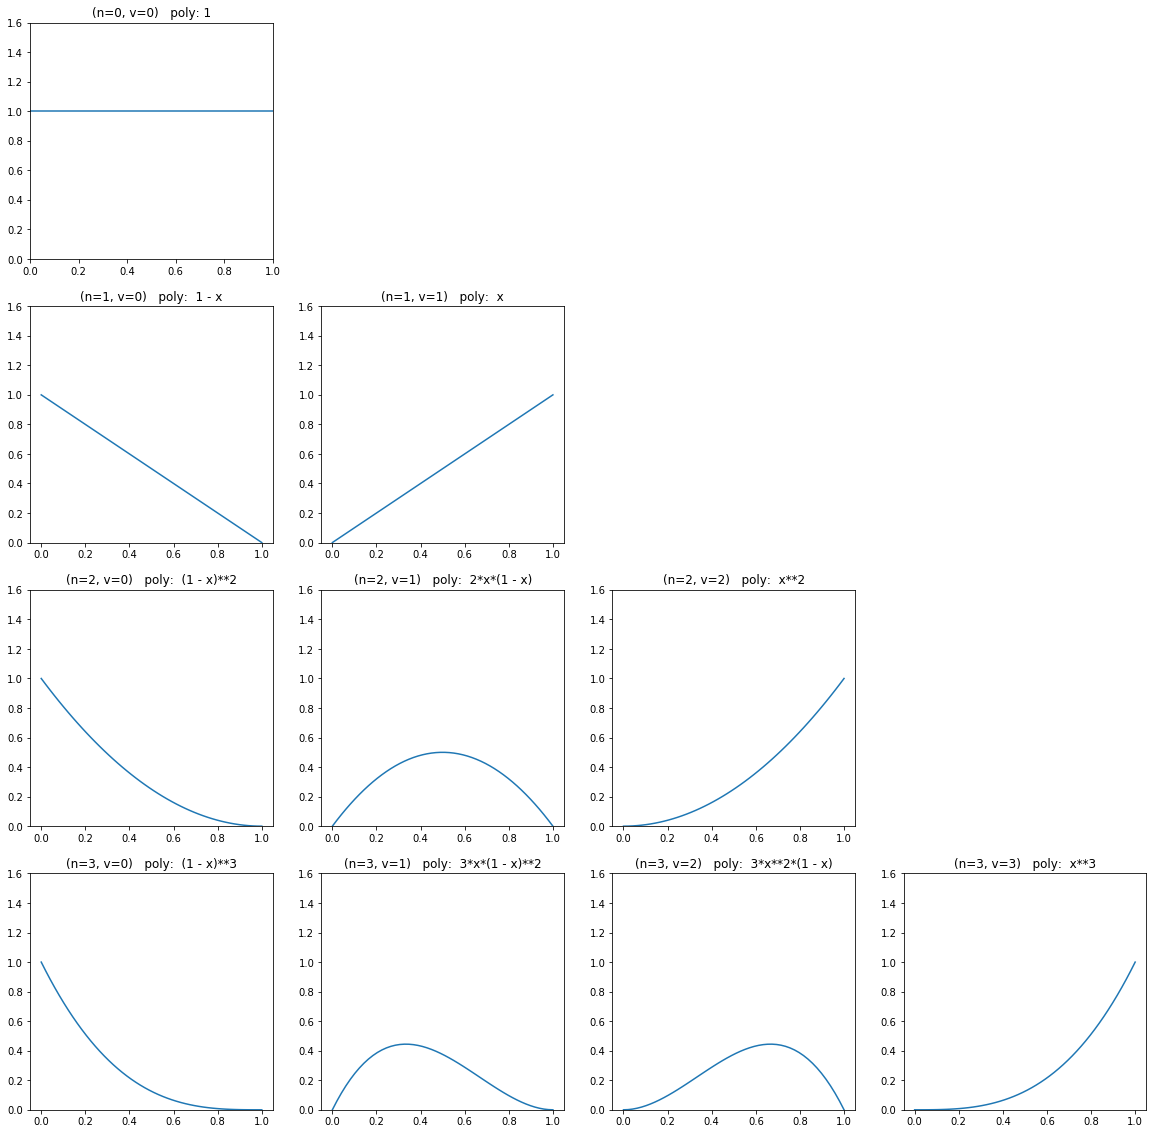

In [223]:
fig, axes = plt.subplots(4,4,figsize=(20,20))
axes[0,0].axhline(y=1, xmin=0.0, xmax=1.0)
axes[0,0].set_title(f"(n=0, v=0)   poly: {1}")#n: {n}   v: {v}\n
axes[0,0].set_ylim(0, 1.6)
axes[0,1].remove()
axes[0,2].remove()
axes[0,3].remove()
#y = 3*x**2*(1-x) #n=3, v=2
for n in n_values[::-1]:
    for v in v_values:
        
        if v<=n:
            print("v:",v," n:",n)
            x = sympy.symbols("x")
            poly = poly_list[n][v]
            lam_x = lambdify(x, poly, modules=['numpy'])
            x_vals = np.linspace(0, 1)
            y_vals = lam_x(x_vals)
            axes[n,v].plot(x_vals,y_vals)
            axes[n,v].set_title(f"(n={n}, v={v})   poly:  {poly}")
            axes[n,v].set_ylim(0, 1.6) 
        else:
            print("not valid combo","v:",v," n:",n)
            axes[n,v].remove()
'''
axes[0,1].remove()

axes[0,2].remove()
axes[1,2].remove()

axes[0,3].remove()
axes[1,3].remove()
axes[2,3].remove()
'''
plt.show()

In [114]:
# print out athe polynomials for n=2, v=2:
poly_list[2][2]

x**2

In [120]:
poly = get_poly(2,2)


<function _lambdifygenerated(x)>

In [143]:
n_valus = [0,1,2,3]
v_valus = [0,1,2,3]

In [144]:
x = sympy.symbols("x")
x_vals = np.linspace(0, 1, 100)

for n in n_valus:
    for v in v_valus:
        if n and v != 0:
            poly = poly_list[n][v]
            lam_poly = lambdify(x, poly, modules=['numpy'])
            y_vals = lam_poly(x_vals)


            #lam_xlambdify(x, poly, modules=['numpy'])


            #axes[0,0].plot(x_vals,y_vals)
            axes[i,j].plot(x_vals,y_vals)
        else:
            pass

IndexError: list index out of range